In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as sklm
import sklearn.metrics as skmet
import matplotlib.pyplot as plt

import sys
sys.path.append("../lib")
import plotting

In [2]:
KEY="2019chs_wk1"

In [3]:
df = pd.read_csv(f"../output/{KEY}_plusminus.csv")
df.index = df.team
df.columns

Index(['team', 'adjustPoints_mean', 'foulPoints_mean', 'cargoPoints_mean',
       'completeRocketRankingPoint_mean', 'rocketPoints_mean', 'rp_mean',
       'sandStormBonusPoints_mean', 'rocketLowPoints_mean',
       'rocketMidPoints_mean', 'teleopPoints_mean', 'win_mean',
       'autoPoints_mean', 'completedRocketNear_mean',
       'habDockingRankingPoint_mean', 'completedRocketFar_mean',
       'totalPoints_mean', 'hatchPanelPoints_mean', 'foulCount_mean',
       'habClimbPoints_mean', 'ownPoints_mean', 'rocketTopPoints_mean',
       'techFoulCount_mean'],
      dtype='object')

In [4]:
xcol = "totalPoints_mean"
x = df[xcol]
y = df.win_mean
names = df.index

In [5]:
model = sklm.LinearRegression().fit(df[[xcol]], y)

In [6]:
yhat = model.predict(df[[xcol]])
error = y - yhat
error_z = (error - error.mean()) / error.std()
skmet.r2_score(y, yhat)

0.7820478282885537

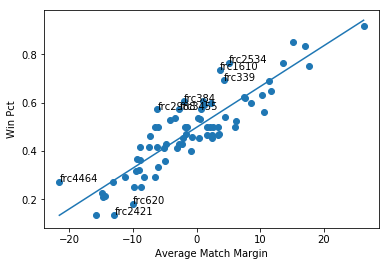

In [7]:
plotting.plot_with_fit(x, y, yhat, names, delta=1.5)

In [8]:
print('"Unluckiest" teams, by z-score')
error_z.sort_values(ascending=True)

"Unluckiest" teams, by z-score


team
frc620    -1.892586
frc2421   -1.844604
frc6882   -1.479768
frc5950   -1.304241
frc1719   -1.293167
frc1598   -1.221113
frc2819   -1.210699
frc6334   -1.162079
frc540    -1.131193
frc316    -1.090953
frc6543   -1.073984
frc7330   -1.068177
frc1731   -1.022572
frc1629   -0.944174
frc1086   -0.839780
frc7429   -0.811128
frc1895   -0.804092
frc3136   -0.737686
frc3361   -0.696522
frc6504   -0.655144
frc614    -0.593617
frc2363   -0.575218
frc1418   -0.555124
frc539    -0.530500
frc6021   -0.515749
frc5957   -0.509062
frc2998   -0.488622
frc4242   -0.463345
frc1413   -0.437112
frc5804   -0.428202
             ...   
frc2199    0.022421
frc3258    0.151921
frc6863    0.213392
frc1522    0.299382
frc5546    0.343288
frc623     0.366589
frc3359    0.375159
frc619     0.427937
frc3373    0.429320
frc977     0.493843
frc617     0.589922
frc1262    0.610108
frc422     0.794917
frc1793    0.810413
frc4286    0.898620
frc1599    0.923667
frc2186    1.126428
frc2028    1.193027
frc1908    1.22